# LetsGrowMore -VIP

## Author: Pranavi Shakkari

### Intermediate Level - Task 2

#### Prediction using Decision Tree  Algorithm 

##### 1.Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics

##### 2.Reading the data

In [2]:
header = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names = header)
print(data)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


##### 3.Data Enhancement

In [3]:
data["category"]=data["class"].factorize()[0]
print(data["category"])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: category, Length: 150, dtype: int64


In [4]:
header.append("category")
data = data.reindex(columns = header)
print(data)

     sepal length  sepal width  petal length  petal width           class  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     category  
0           0  
1           0  
2           0  
3          

##### 4. Data Classification

In [5]:
x_data=data.reindex(columns=["sepal length", "sepal width", "petal length", "petal width"])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, data["category"], test_size=0.3, random_state=42)

In [7]:
def fit_model(classifier, X_train, X_test, y_train, y_test):
    result = {}
    
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    
    result['accuracy'] = metrics.accuracy_score(y_test,y_pred)*100
   
    result['model'] = model

    return result


In [8]:
model_result={}
dec_tree_gini = tree.DecisionTreeClassifier(criterion='gini')
model_result['DT - Gini'] = fit_model(dec_tree_gini, x_train, x_test, y_train, y_test)
dec_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy')
model_result['DT - entropy'] = fit_model(dec_tree_entropy, x_train, x_test, y_train, y_test)
print(model_result)

{'DT - Gini': {'accuracy': 100.0, 'model': DecisionTreeClassifier()}, 'DT - entropy': {'accuracy': 100.0, 'model': DecisionTreeClassifier(criterion='entropy')}}


In [9]:
! pip install graphviz

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


##### 5.Visualizing the tree

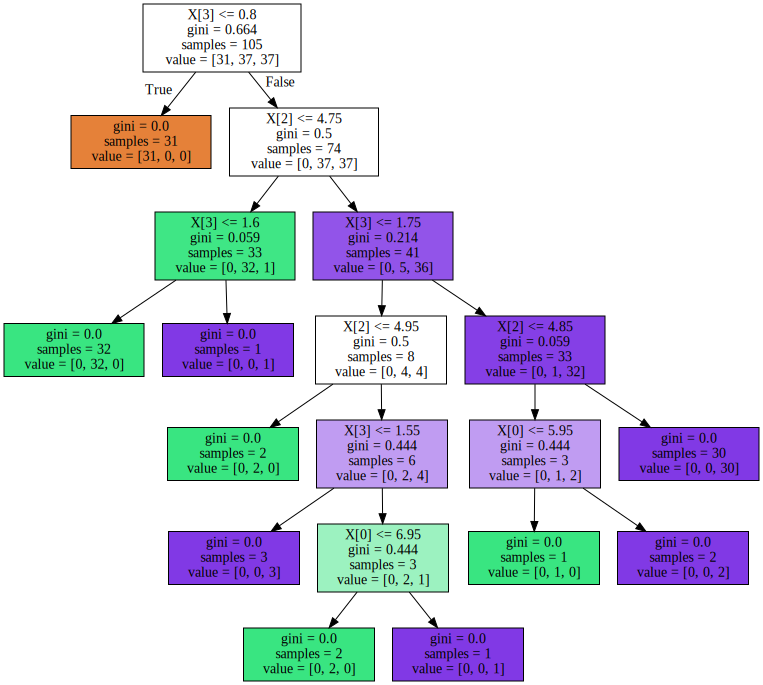

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(dec_tree_gini.fit(x_train, y_train), out_file=None, filled = True))
display(SVG(graph.pipe(format='svg')))

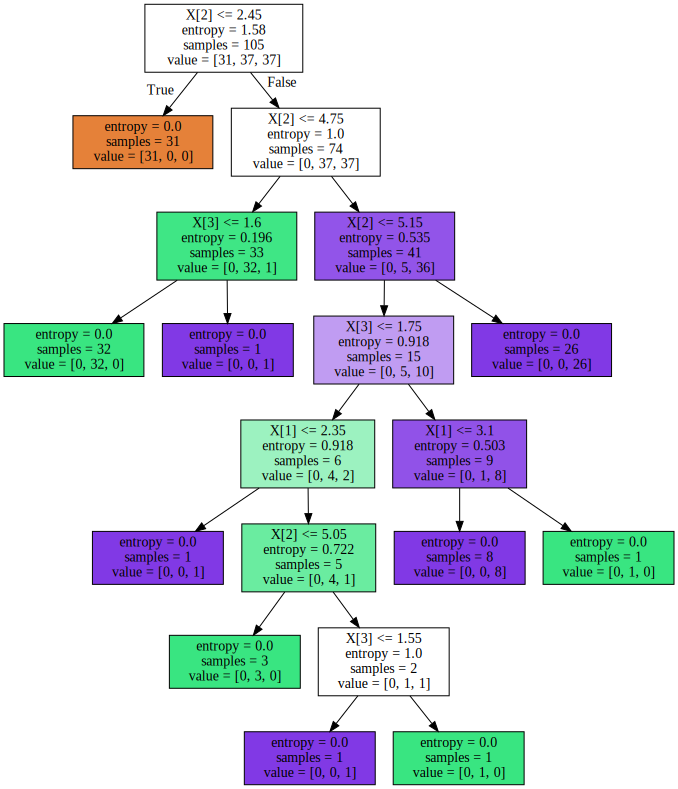

In [12]:
plt.rcParams['figure.figsize'] = [8,8]
graph = Source(tree.export_graphviz(dec_tree_entropy.fit(x_train, y_train), out_file=None, filled = True))
display(SVG(graph.pipe(format='svg')))